# Example - using ELiXer classify API to calculate P(LAE)/P(OII


This API is fairly limited in this version. You are responsible for determining on your own the key parameters. A future version of ELiXer will provide additional APIs to facilitate this.

In short, however, you might typically take the wave, flux, and flux_err from the HETDEX detection data. The equivalent width could then been calcuated from the HETDEX continuum estimate or from the aperture or catalog match magnitude as in the catalogs.ipynb examples.


# if you are referencing the HDR1 directory or copied elixer locally, execute this cell (with the correct path to elixer)

In [1]:
# if you are referencing the HDR1 directory or copied elixer locally, execute this cell (with the correct path to elixer)
import sys
#sys.path.append('/work/03946/hetdex/hdr1/software/elixer')
sys.path.append('/home/dustin/code/python/hetdex_api')
sys.path.append('/home/dustin/code/python/elixer')
import classify
import catalogs

/home/dustin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# if you installed elixer with pip, execute this cell instead. If you are using Python3.x you will likely receive a series of deprecation warnings. For now, this is okay.

In [ ]:
# if you installed elixer with pip, execute this cell
from elixer import catalogs
from elixer import classify

# Request package help information

In [25]:
help(classify)


#you can also request help on individual functions
#help(classify.plae_poii)

Help on module classify:

NAME
    classify - #API Wrapper for classification (mostly P(LAE)/P(OII))

FUNCTIONS
    plae_poii(line_wave, line_flux, line_flux_err, eqw_obs, eqw_obs_err, addl_wave=[], addl_flux=[], addl_flux_err=[], estimate_error=False)
        Returns the Bayesian P(LAE)/P(OII) from EW distributions of LAEs and OII galaxies from
        Leung+ 2017
        
        Maximum P(LAE)/P(OII) is capped at 999. There is no minimum value but 0.0 represents an
        error or inability to calcluate the ratio.
        
        Uses ELiXer standard options and cosmology
        
        :param line_wave:  observed wavelength of the emission line in angstroms
        :param line_flux:  observed line flux (cgs)
        :param line_flux_err: observed line flux error (cgs)
        :param eqw_obs: observed equivalent width
        :param eqw_obs_err: observed equivalent width error
        :param addl_wave: array of additional emission line wavelengths in angstroms
        :param add

wave = 3711.0
flux = 1.62e-15
flux_err = 4.0e-17
ew = 500.0
ew_err = 60.0
addl_wave = []
addl_flux = []
addl_flux_err = []
classify.plae_poii(wave,flux,flux_err,ew,ew_err,None,None,None)

# Example call

In this case, this strongly favors LyA over OII (in point of fact, given the wavelength, OII is not possible).

In [21]:
wave = 3711.0 
flux = 1.7e-15 
flux_err = 4.0e-17 
ew = 600.0 
ew_err = 0.0 

ratio, plae,poii, details = classify.plae_poii(line_wave=wave, line_flux=flux, line_flux_err=flux_err, eqw_obs=ew, eqw_obs_err=ew_err,
                   addl_wave=None, addl_flux=None, addl_flux_err=None, estimate_error=True)


In [22]:
print(ratio, plae, poii)

1000.0 1.0 0.001


In [23]:
details

{'ratio': [1000.0], 'plgd': [1.0], 'pogd': [0.001]}

# Using mostly the same data, we place the line at a longer wavelength where OII is possible and reduce the equivalent width

Now, this strongly suggests OII is far more likely than LyA

In [24]:
wave = 4711.0 
flux = 1.7e-15 
flux_err = 4.0e-17 
ew = 300.0 
ew_err = 0.0 

classify.plae_poii(wave,flux,flux_err,ew,ew_err,None,None,None)

(0.001, 3.691332144931839e-05, <Quantity 0.99996309>)

# Solutions
Here we will collect a sample spectrum from HETDEX and run it through the ELiXer solution finder to detect emission lines and find possible redshift solution(s)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from hetdex_api.detections import Detections
detects = Detections('hdr1').refine()

In [3]:
#using an exsting HETDEX detection to illustrate
spec_table = detects.get_spectrum(1000028279)
waves = spec_table[0][:]
flux = spec_table[1][:]
err = spec_table[2][:]
central = 3907.12

In [19]:
sol = classify.solution_finder(waves,flux,err,central)

sol

{'primary_wave': 3907.12,
 'eqw_obs': (151.95999285429502, 37.04766435099574),
 'plae_poii': (1000.0, (1000.0, 1000.0)),
 'emission_lines': [{'wave': 3907.171110710506,
   'continuum': 2.464262013421455e-18,
   'fwhm': 8.53239315684626,
   'int_flux': 4.806734530932443e-16,
   'snr': 29.352356710430747,
   'line_score': 141.08898656427408,
   'aborption': False},
  {'wave': 4979.383818171707,
   'continuum': 4.0821783505320824e-18,
   'fwhm': 12.717051016799315,
   'int_flux': 1.0518088447793584e-16,
   'snr': 11.653003007869179,
   'line_score': 12.256731631917269,
   'aborption': False}],
 'solutions': [{'wave_rest': 1216.0,
   'name': 'Ly$\\alpha$',
   'z': 2.213092105263158,
   'score': 13.673090165862103,
   'frac_score': 1.0,
   'lines': [{'wave_obs': 4978.621955263157,
     'wave_rest': 1549.48,
     'name': 'CIV ',
     'z': 2.213092105263158,
     'line_score': 13.673090165862103,
     'snr': 13.12019198169777,
     'int_flux': 1.0421410132516054e-16,
     'fwhm': 12.649655911

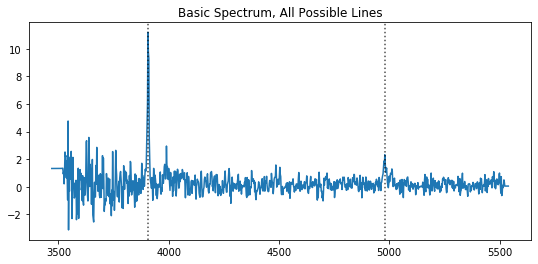

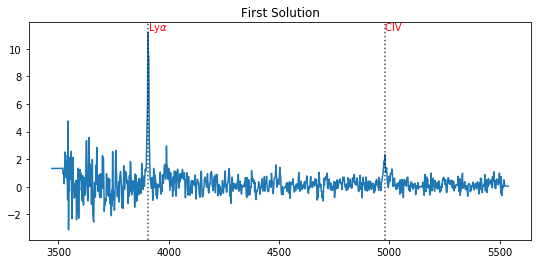

In [20]:
#plot the basic spectrum 
fig = plt.figure(figsize=(9,4))
plt.plot(waves,flux)
plt.title("Basic Spectrum, All Possible Lines")

#with all possible lines
for line in sol['emission_lines']:
    plt.axvline(line['wave'],color='k',alpha=0.7,linestyle=":")
    

#plot solutions (if any)
if sol['solutions'] is not None:
    plt.figure(figsize=(9,4))
    plt.title("First Solution")
    plt.plot(waves,flux)
    ymax = plt.gca().get_ylim()[1] #get the top 
    
    #plot the label for the primary (anchor) line
    plt.axvline(sol['primary_wave'],color='k',alpha=0.7,linestyle=":")
    plt.annotate(xy=(sol['primary_wave'],0.95*ymax),s=sol['solutions'][0]['name'],color='r')
    
    #plot all other lines
    for line in sol['solutions'][0]['lines']:
        plt.axvline(line['wave_obs'],color='k',alpha=0.7,linestyle=":")
        plt.annotate(xy=(line['wave_obs'],0.95*ymax),s=line['name'],color='r')


In [18]:
# the central wavelength (main line) does not have to be specified ... if it is not ELiXer will attempt to find
# the lines and then use the line with the largest integrated flux as the primary line
sol = classify.solution_finder(waves,flux,err)
print(sol)

{'primary_wave': 3907.1711107503097, 'eqw_obs': (151.9095912839208, 37.04135839532582), 'plae_poii': (1000.0, (1000.0, 1000.0)), 'emission_lines': [{'wave': 3907.171110710506, 'continuum': 2.464262013421455e-18, 'fwhm': 8.53239315684626, 'int_flux': 4.806734530932443e-16, 'snr': 29.352356710430747, 'line_score': 141.08898656427408, 'aborption': False}, {'wave': 4979.383818171707, 'continuum': 4.0821783505320824e-18, 'fwhm': 12.717051016799315, 'int_flux': 1.0518088447793584e-16, 'snr': 11.653003007869179, 'line_score': 12.256731631917269, 'aborption': False}], 'solutions': [{'wave_rest': 1216.0, 'name': 'Ly$\\alpha$', 'z': 2.2131341371301887, 'score': 13.673090165862103, 'frac_score': 1.0, 'lines': [{'wave_obs': 4978.687082800485, 'wave_rest': 1549.48, 'name': 'CIV ', 'z': 2.2131341371301887, 'line_score': 13.673090165862103, 'snr': 13.12019198169777, 'int_flux': 1.0421410132516054e-16, 'fwhm': 12.649655911214769, 'aborption': False}], 'rejected_lines': []}]}
